### Tensorflow Hub
- https://www.tensorflow.org/hub?hl=ko

In [ ]:
!pip install tensorflow_hub 

In [29]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import time
import cv2

# 이미지 & 비디오 다운로드

In [7]:
!mkdir /content/data
!wget -O ./data/beatles01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg

mkdir: cannot create directory ‘/content/data’: File exists
--2021-07-20 05:33:36--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/beatles01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 383118 (374K) [image/jpeg]
Saving to: ‘./data/beatles01.jpg’

./data/beatles01.jp 100%[===================>] 374.14K  --.-KB/s    in 0.02s   

2021-07-20 05:33:36 (15.3 MB/s) - ‘./data/beatles01.jpg’ saved [383118/383118]



In [3]:
!wget -O ./data/baseball01.jpg https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg

--2021-07-20 05:32:24--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/image/baseball01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76279 (74K) [image/jpeg]
Saving to: ‘./data/baseball01.jpg’

./data/baseball01.j 100%[===================>]  74.49K  --.-KB/s    in 0.008s  

2021-07-20 05:32:25 (8.61 MB/s) - ‘./data/baseball01.jpg’ saved [76279/76279]



In [4]:
!wget -O ./data/Jonh_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-07-20 05:32:29--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-07-20 05:32:30--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-07-20 05:32:30--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

# Inference

In [8]:
module_handle = 'https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2'
detector_model = hub.load(module_handle)

In [12]:
def load_img(path):
  img = tf.io.read_file(path)
  img = tf.image.decode_jpeg(img, channels=3)
  print(img.shape, type(img))
  return img

In [15]:
img = load_img('/content/data/beatles01.jpg')
converted_img = tf.image.convert_image_dtype(img, tf.uint8)[tf.newaxis, ...]
start_time = time.time()

# inference 수행
pred = detector_model(converted_img)
end_time = time.time()
print(pred)

(633, 806, 3) <class 'tensorflow.python.framework.ops.EagerTensor'>
{'detection_classes': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 1.,  1.,  3.,  1.,  3.,  1.,  3.,  3.,  3.,  3.,  3.,  3.,  1.,
         1., 41.,  3.,  3.,  3.,  8.,  1.,  1.,  3.,  3.,  1.,  1.,  1.,
         1.,  1.,  3.,  1.,  1.,  1.,  3.,  3., 15., 32.,  8.,  3., 15.,
         8., 31., 31., 15.,  1.,  1.,  1.,  3., 15.,  3., 32.,  1.,  1.,
        31., 31., 27.,  1.,  1.,  3., 39.,  1., 34.,  1.,  4., 31.,  1.,
         1.,  1.,  3., 37.,  1.,  1.,  3.,  1.,  8.,  3., 31.,  3.,  3.,
         1., 41.,  1.,  1., 31.,  8., 39., 15.,  1., 39., 10.,  1.,  1.,
         3.,  3., 41.,  6., 15.,  1.,  1., 41.,  1.]], dtype=float32)>, 'detection_scores': <tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.77021056, 0.72674185, 0.711648  , 0.7034559 , 0.6867077 ,
        0.6797771 , 0.6687491 , 0.6119806 , 0.5854923 , 0.5827279 ,
        0.5665505 , 0.5364256 , 0.52897376, 0.48493817, 0.47481674,
   

In [18]:
print(pred.keys())
print(pred['detection_boxes'].shape, pred['detection_classes'].shape, pred['num_detections'].shape, pred['detection_scores'].shape)

dict_keys(['detection_classes', 'detection_scores', 'raw_detection_scores', 'detection_anchor_indices', 'raw_detection_boxes', 'detection_multiclass_scores', 'detection_boxes', 'num_detections'])
(1, 100, 4) (1, 100) (1,) (1, 100)


In [23]:
print(pred['detection_classes'])
print(pred['detection_scores'])

tf.Tensor(
[[ 1.  1.  3.  1.  3.  1.  3.  3.  3.  3.  3.  3.  1.  1. 41.  3.  3.  3.
   8.  1.  1.  3.  3.  1.  1.  1.  1.  1.  3.  1.  1.  1.  3.  3. 15. 32.
   8.  3. 15.  8. 31. 31. 15.  1.  1.  1.  3. 15.  3. 32.  1.  1. 31. 31.
  27.  1.  1.  3. 39.  1. 34.  1.  4. 31.  1.  1.  1.  3. 37.  1.  1.  3.
   1.  8.  3. 31.  3.  3.  1. 41.  1.  1. 31.  8. 39. 15.  1. 39. 10.  1.
   1.  3.  3. 41.  6. 15.  1.  1. 41.  1.]], shape=(1, 100), dtype=float32)
tf.Tensor(
[[0.77021056 0.72674185 0.711648   0.7034559  0.6867077  0.6797771
  0.6687491  0.6119806  0.5854923  0.5827279  0.5665505  0.5364256
  0.52897376 0.48493817 0.47481674 0.45792735 0.44469458 0.4418359
  0.43887186 0.4029167  0.3927573  0.38989383 0.37533727 0.36976907
  0.36425212 0.3609897  0.3517857  0.34206346 0.33741173 0.33459765
  0.3339587  0.3246461  0.3213307  0.3150096  0.312529   0.31094822
  0.30640736 0.30583996 0.29852283 0.29017326 0.2890519  0.2872416
  0.2835358  0.28336692 0.28065872 0.2790972  0.27065945 0.2

In [25]:
print(pred['detection_boxes'])

tf.Tensor(
[[[0.4231441  0.482952   0.8869697  0.6806065 ]
  [0.41372657 0.0761649  0.87307453 0.24614587]
  [0.35884547 0.62747926 0.45850927 0.7058205 ]
  [0.4128958  0.69399    0.88071156 0.87154853]
  [0.3716441  0.58632386 0.4280739  0.63786876]
  [0.4102714  0.28251073 0.8724972  0.44755784]
  [0.37645614 0.38434273 0.41987747 0.43637002]
  [0.35195634 0.49268076 0.37197307 0.51700634]
  [0.38615337 0.1676572  0.5453669  0.31292298]
  [0.3546849  0.5427934  0.38089865 0.5732291 ]
  [0.3596151  0.45640856 0.37590426 0.4735974 ]
  [0.35833183 0.54140383 0.40901062 0.5949541 ]
  [0.4079009  0.7485752  0.81735075 0.86322904]
  [0.4296944  0.5321253  0.80907774 0.65092796]
  [0.8339844  0.71217006 1.         0.95154303]
  [0.38662434 0.8048508  0.42710626 0.8528762 ]
  [0.36289728 0.6655924  0.4547972  0.73538715]
  [0.37556624 0.8425474  0.4136709  0.8821852 ]
  [0.35884547 0.62747926 0.45850927 0.7058205 ]
  [0.41312826 0.08538242 0.78615487 0.2095109 ]
  [0.40711597 0.7962738  0.51

In [26]:
# 1부터 91까지의 COCO Class id 매핑. 
labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [27]:
# pred내의 값들을 모두 numpy로 변환해줌
pred = {key: value.numpy() for key, value in pred.items()}

In [28]:
def get_ssd_detector(module_handle="https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"):
  detector = hub.load(module_handle)
  return detector

detector_model = get_ssd_detector()

In [31]:
img_array = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)

h = img_array.shape[0]
w = img_array.shape[1]
draw_img = img_array.copy()

img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]

result = detector_model(img_tensor)
result = {key:value.numpy() for key,value in result.items()}

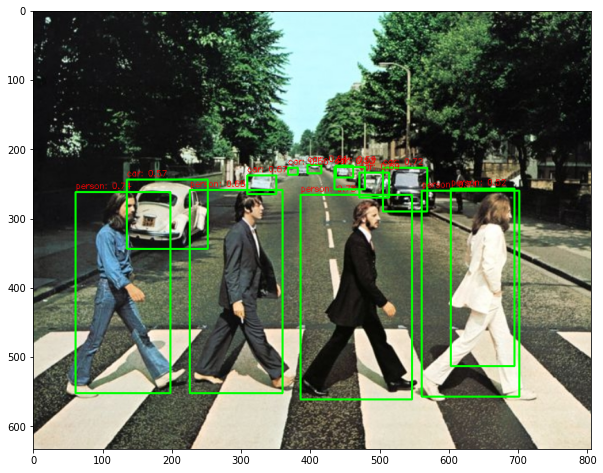

In [33]:
green_color=(0, 255, 0)
red_color=(255, 0, 0)

SCORE_THRESHOLD = 0.5
OBJECT_DEFAULT_COUNT = 100

for i in range(min(result['detection_scores'][0].shape[0], OBJECT_DEFAULT_COUNT)):
  score = result['detection_scores'][0,i]
  if score < SCORE_THRESHOLD:
    break

  box = result['detection_boxes'][0,i]

  x1 = int(box[1] * w)
  y1 = int(box[0] * h)
  x2 = int(box[3] * w)
  y2 = int(box[2] * h)
  
  class_id = result['detection_classes'][0, i]
  caption = '{}: {:.2f}'.format(labels_to_names[class_id], score)
  cv2.rectangle(draw_img, (x1,y1),(x2,y2), color=green_color, thickness=2)
  cv2.putText(draw_img, caption, (x1, y1-5), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

plt.figure(figsize=(10,10))
plt.imshow(draw_img)

In [34]:
def get_detected_img(model, img_array, score_threshold, object_show_count=100, is_print=True):   
  # scaling된 이미지 기반으로 bounding box 위치가 예측 되므로 이를 다시 원복하기 위해 원본 이미지 shape정보 필요
  height = img_array.shape[0]
  width = img_array.shape[1]
  # cv2의 rectangle()은 인자로 들어온 이미지 배열에 직접 사각형을 업데이트 하므로 그림 표현을 위한 별도의 이미지 배열 생성. 
  draw_img = img_array.copy()

  # bounding box의 테두리와 caption 글자색 지정
  green_color=(0, 255, 0)
  red_color=(0, 0, 255)

  # cv2로 만들어진 numpy image array를 tensor로 변환
  img_tensor = tf.convert_to_tensor(img_array, dtype=tf.uint8)[tf.newaxis, ...]
  #img_tensor = tf.convert_to_tensor(img_array, dtype=tf.float32)[tf.newaxis, ...]

  # ssd+mobilenet v2 모델을 다운로드 한 뒤 inference 수행. 
  start_time = time.time()
  result = model(img_tensor)
  # result 내부의 value를 numpy 로 변환. 
  result = {key:value.numpy() for key,value in result.items()}

  # detected 된 object들을 iteration 하면서 정보 추출. detect된 object의 갯수는 100개
  for i in range(min(result['detection_scores'][0].shape[0], object_show_count)):
    # detection score를 iteration시 마다 높은 순으로 추출하고 SCORE_THRESHOLD보다 낮으면 loop 중단. 
    score = result['detection_scores'][0, i]
    if score < score_threshold:
      break
    # detected된 object들은 scale된 기준으로 예측되었으므로 다시 원본 이미지 비율로 계산
    box = result['detection_boxes'][0, i]

    ''' **** 주의 ******
    box는 ymin, xmin, ymax, xmax 순서로 되어 있음. '''
    left = box[1] * width
    top = box[0] * height
    right = box[3] * width
    bottom = box[2] * height

    # class id 추출하고 class 명으로 매핑
    class_id = result['detection_classes'][0, i]
    caption = "{}: {:.4f}".format(labels_to_names[class_id], score)
    print(caption)
    #cv2.rectangle()은 인자로 들어온 draw_img에 사각형을 그림. 위치 인자는 반드시 정수형.
    cv2.rectangle(draw_img, (int(left), int(top)), (int(right), int(bottom)), color=green_color, thickness=2)
    cv2.putText(draw_img, caption, (int(left), int(top - 5)), cv2.FONT_HERSHEY_SIMPLEX, 0.4, red_color, 1)

  if is_print:
    print('Detection 수행시간:',round(time.time() - start_time, 2),"초")

  return draw_img

person: 0.7767
person: 0.7362
car: 0.7209
person: 0.7084
car: 0.6868
person: 0.6846
car: 0.6652
car: 0.6145
car: 0.5854
car: 0.5724
car: 0.5606
car: 0.5341
person: 0.5228
Detection 수행시간: 0.07 초


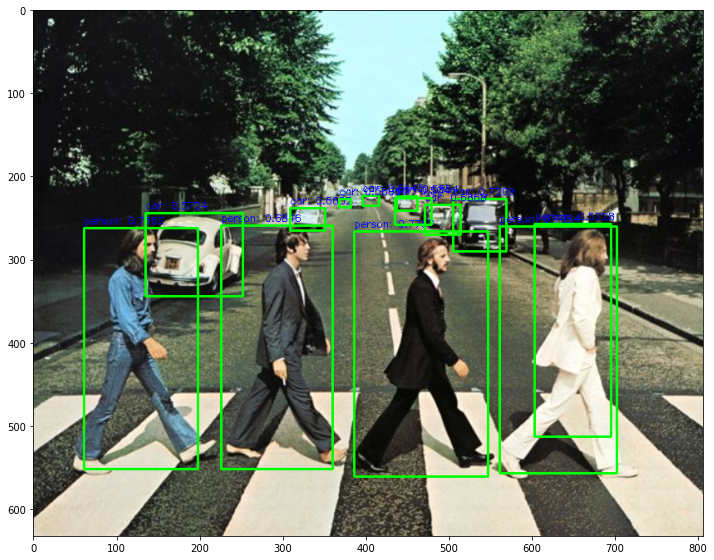

In [35]:
img_array = cv2.cvtColor(cv2.imread('/content/data/beatles01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_img(detector_model, img_array, score_threshold=0.5, object_show_count=100, is_print=True)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

person: 0.8886
person: 0.8754
person: 0.8638
baseball bat: 0.5842
baseball glove: 0.5645
baseball glove: 0.5182
baseball bat: 0.5007
Detection 수행시간: 0.06 초


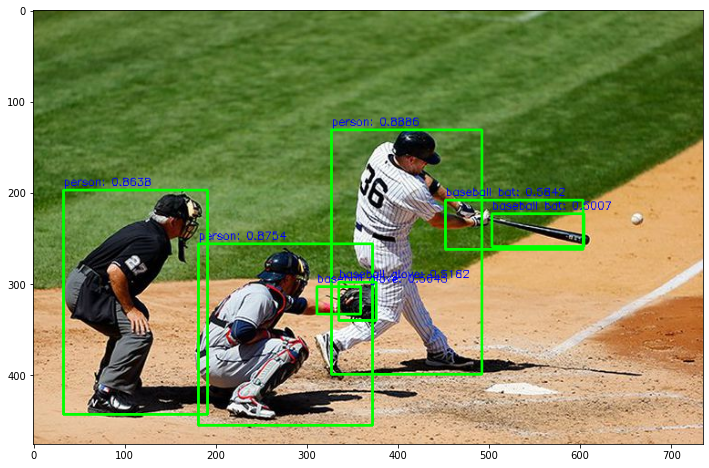

In [36]:
img_array = cv2.cvtColor(cv2.imread('/content/data/baseball01.jpg'), cv2.COLOR_BGR2RGB)
draw_img = get_detected_img(detector_model, img_array, score_threshold=0.5, object_show_count=100, is_print=True)

plt.figure(figsize=(12, 12))
plt.imshow(draw_img)

In [37]:
def do_detected_video(model, input_path, output_path, score_threshold, is_print):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')

    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    green_color=(0, 255, 0)
    red_color=(0, 0, 255)
    while True:
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다.')
            break
        
        img_frame = get_detected_img(model, img_frame, score_threshold=score_threshold, object_show_count=100, is_print=is_print)
        
        vid_writer.write(img_frame)
    # end of while loop

    vid_writer.release()
    cap.release()

In [38]:
do_detected_video(detector_model, '/content/data/Jonh_Wick_small.mp4', './data/John_Wick_small_02.mp4', 0.5, True)

총 Frame 갯수: 58
car: 0.6785
car: 0.5698
car: 0.5395
Detection 수행시간: 0.06 초
car: 0.6946
car: 0.5763
car: 0.5395
Detection 수행시간: 0.06 초
motorcycle: 0.6226
person: 0.5840
car: 0.5559
Detection 수행시간: 0.06 초
car: 0.5359
person: 0.5348
car: 0.5228
Detection 수행시간: 0.06 초
car: 0.6281
car: 0.6254
motorcycle: 0.6097
person: 0.5842
Detection 수행시간: 0.06 초
car: 0.6241
person: 0.6053
car: 0.5280
Detection 수행시간: 0.05 초
car: 0.6307
person: 0.5982
car: 0.5157
Detection 수행시간: 0.05 초
car: 0.6952
person: 0.6058
motorcycle: 0.5257
motorcycle: 0.5150
Detection 수행시간: 0.06 초
person: 0.6923
car: 0.6280
motorcycle: 0.5511
car: 0.5127
Detection 수행시간: 0.06 초
person: 0.6850
car: 0.6466
car: 0.5946
motorcycle: 0.5325
Detection 수행시간: 0.06 초
car: 0.6627
car: 0.6265
person: 0.5025
Detection 수행시간: 0.06 초
car: 0.6668
car: 0.6445
person: 0.5397
motorcycle: 0.5068
Detection 수행시간: 0.05 초
person: 0.5929
car: 0.5350
Detection 수행시간: 0.05 초
person: 0.6150
car: 0.5573
car: 0.5510
person: 0.5106
person: 0.5007
Detection 수행시간: 0.0